### Buisness Case

Purpose: to detect a situation in which fire threatens people
Stakeholder: fire department working on early warning system and
response to fire threats

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import featuretools as ft
import missingno as ms
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import MyFunc as mf
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import ADASYN, SMOTE
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn import metrics
import optuna


2024-06-07 23:00:37,000 featuretools - WARNING    While loading primitives via "premium_primitives" entry point, ignored primitive "DiversityScore" from "premium_primitives.diversity_score" because a primitive with that name already exists in "nlp_primitives.diversity_score"
2024-06-07 23:00:37,001 featuretools - WARNING    While loading primitives via "premium_primitives" entry point, ignored primitive "LSA" from "premium_primitives.lsa" because a primitive with that name already exists in "nlp_primitives.lsa"
2024-06-07 23:00:37,001 featuretools - WARNING    While loading primitives via "premium_primitives" entry point, ignored primitive "MeanCharactersPerSentence" from "premium_primitives.mean_characters_per_sentence" because a primitive with that name already exists in "nlp_primitives.mean_characters_per_sentence"
2024-06-07 23:00:37,002 featuretools - WARNING    While loading primitives via "premium_primitives" entry point, ignored primitive "NumberOfSentences" from "premium_primi

### Notebook Options


In [2]:
# Set table to show all columns
pd.set_option('display.max_columns', None)

### Dataset Imports

In [3]:
# Read train dataset 
df = pd.read_csv('CSV\Fire-Incidents.csv')

### Data Check & Inspection

In [4]:
df.head()

,Area_of_Origin,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Last_TFS_Unit_Clear_Time,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
0,Porch or Balcony,No business interruption,0,86,3000,0,2018-08-24T17:06:26,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,2018-08-24T17:06:28,Undetermined,114,18.0,2018-08-24T17:42:43,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24T16:49:36,2018-08-24T16:54:09
1,Cooking Area or Kitchen,Undetermined,0,28,50000,28,2018-11-24T07:19:00,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,2018-11-24T07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,2018-11-24T12:45:21,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24T07:09:12,2018-11-24T07:14:23
2,"Living Area (e.g. living, TV, recreation, etc)",Not applicable (not a business),1,16,1000000,130,2017-02-09T18:02:13,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2017-02-09T18:36:21,Undetermined,325,27.0,2017-02-09T23:36:33,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09T17:45:07,2017-02-09T17:48:49
3,Undetermined (formerly 98),May not resume operations,0,12,1000000,14,2012-10-30T00:52:04,Entire Structure,Undetermined,Fire alarm system operation undetermined,Undetermined,2012-10-30T01:28:48,Undetermined,332,20.0,2012-11-01T16:30:31,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30T00:42:01,2012-10-30T00:44:58
4,"Sleeping Area or Bedroom (inc. patients room, ...",Not applicable (not a business),8,11,125000,2,2018-07-08T04:35:00,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2018-07-08T04:38:28,Matches or Lighters (unable to distinguish),442,5.0,2018-07-08T16:44:07,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08T04:08:50,2018-07-08T04:13:54


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11214 entries, 0 to 11213
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Area_of_Origin                            11214 non-null  object 
 1   Business_Impact                           11214 non-null  object 
 2   Civilian_Casualties                       11214 non-null  int64  
 3   Count_of_Persons_Rescued                  11214 non-null  int64  
 4   Estimated_Dollar_Loss                     11214 non-null  int64  
 5   Estimated_Number_Of_Persons_Displaced     11214 non-null  int64  
 6   Ext_agent_app_or_defer_time               11214 non-null  object 
 7   Extent_Of_Fire                            11214 non-null  object 
 8   Fire_Alarm_System_Impact_on_Evacuation    11214 non-null  object 
 9   Fire_Alarm_System_Operation               11214 non-null  object 
 10  Fire_Alarm_System_Presence        

In [6]:
df.describe()

,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Incident_Station_Area,Incident_Ward,Latitude,Longitude
count,11214.000000,11214.000000,1.121400e+04,11214.000000,11214.000000,11181.000000,11214.000000,11214.000000
mean,0.112538,0.062154,4.294369e+04,17.274835,288.281880,19.582685,43.705190,-79.403323
std,0.456429,0.962587,5.339367e+05,119.071696,107.515995,11.762782,0.051183,0.101086
min,0.000000,0.000000,0.000000e+00,0.000000,111.000000,1.000000,43.588926,-79.635241
25%,0.000000,0.000000,2.500000e+02,0.000000,221.000000,10.000000,43.662474,-79.479273
50%,0.000000,0.000000,2.500000e+03,0.000000,314.000000,19.000000,43.697050,-79.403892
75%,0.000000,0.000000,1.500000e+04,1.000000,346.000000,28.000000,43.747770,-79.337150
max,15.000000,86.000000,5.000000e+07,999.000000,445.000000,44.000000,43.846200,-79.124410


<Axes: >

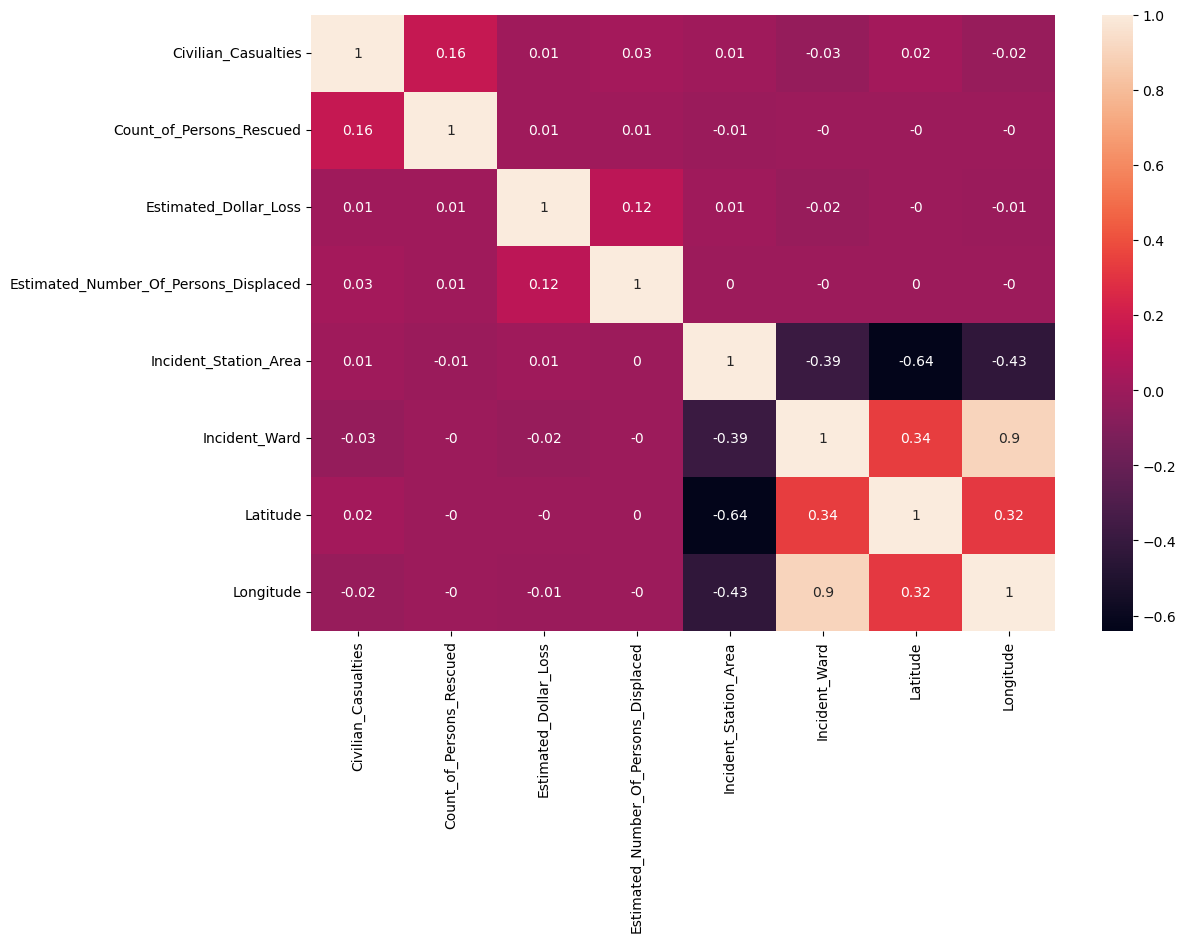

In [7]:
# Correlation with Heatmap
corr = df.select_dtypes('number').corr().round(2)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot= True)

### Data Cleaning

#### Column drop

In [8]:
column_to_drop = ['Business_Impact', 'Estimated_Dollar_Loss', 'Ext_agent_app_or_defer_time', 'Latitude', 'Longitude']

In [9]:
# Drop not needed columns
df.drop(columns=column_to_drop, inplace= True)

#### Missing Values

<Axes: >

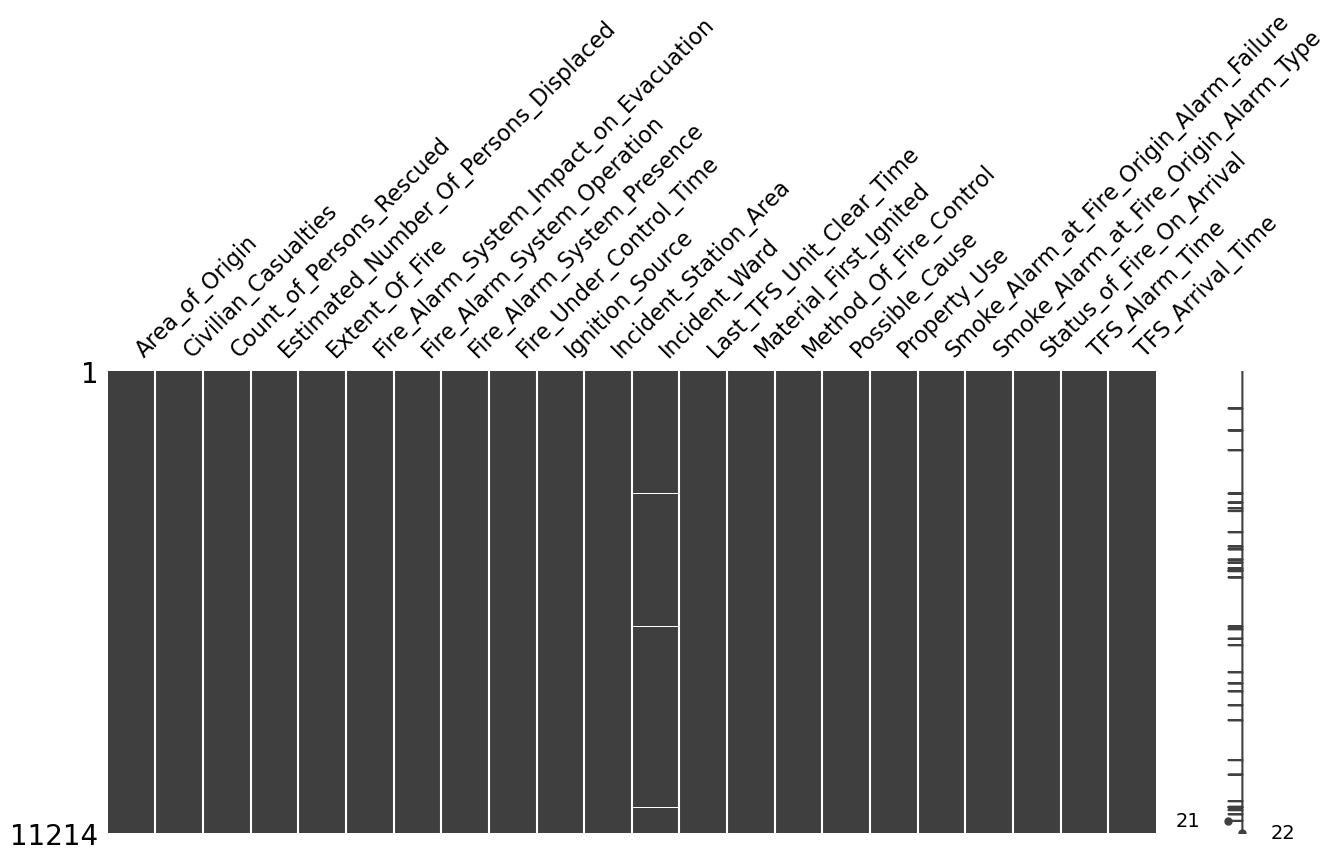

In [10]:
# Missing values on chart
ms.matrix(df, figsize= (15, 6))

In [11]:
# Number of missing values
df.isna().sum()

Area_of_Origin                               0
Civilian_Casualties                          0
Count_of_Persons_Rescued                     0
Estimated_Number_Of_Persons_Displaced        0
Extent_Of_Fire                               0
Fire_Alarm_System_Impact_on_Evacuation       0
Fire_Alarm_System_Operation                  0
Fire_Alarm_System_Presence                   0
Fire_Under_Control_Time                      0
Ignition_Source                              0
Incident_Station_Area                        0
Incident_Ward                               33
Last_TFS_Unit_Clear_Time                     0
Material_First_Ignited                       0
Method_Of_Fire_Control                       0
Possible_Cause                               0
Property_Use                                 0
Smoke_Alarm_at_Fire_Origin_Alarm_Failure     0
Smoke_Alarm_at_Fire_Origin_Alarm_Type        0
Status_of_Fire_On_Arrival                    0
TFS_Alarm_Time                               0
TFS_Arrival_T

In [12]:
# Drop all missing values, less than 5 % of dataset
df.dropna(inplace= True)

In [13]:
# Check if drop was successfully
assert (df.isna().sum().sum() == 0), "There are still missing values !"
print('No missing values in dataset !')

No missing values in dataset !


#### Data Type Change

In [14]:
# Change to datetime
df['TFS_Alarm_Time'] = pd.to_datetime(df['TFS_Alarm_Time'])

In [15]:
# Change to datetime
df['TFS_Arrival_Time'] = pd.to_datetime(df['TFS_Arrival_Time'])

In [16]:
df['Last_TFS_Unit_Clear_Time'] = pd.to_datetime(df['Last_TFS_Unit_Clear_Time'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11181 entries, 0 to 11213
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Area_of_Origin                            11181 non-null  object        
 1   Civilian_Casualties                       11181 non-null  int64         
 2   Count_of_Persons_Rescued                  11181 non-null  int64         
 3   Estimated_Number_Of_Persons_Displaced     11181 non-null  int64         
 4   Extent_Of_Fire                            11181 non-null  object        
 5   Fire_Alarm_System_Impact_on_Evacuation    11181 non-null  object        
 6   Fire_Alarm_System_Operation               11181 non-null  object        
 7   Fire_Alarm_System_Presence                11181 non-null  object        
 8   Fire_Under_Control_Time                   11181 non-null  object        
 9   Ignition_Source                  

### Feature Enginering

In [18]:
# Value change in civilian_casualties
df.loc[df['Civilian_Casualties'] > 0, ['Civilian_Casualties']] = 1

In [19]:
df.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Last_TFS_Unit_Clear_Time,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
0,Porch or Balcony,0,86,0,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,2018-08-24T17:06:28,Undetermined,114,18.0,2018-08-24 17:42:43,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24 16:49:36,2018-08-24 16:54:09
1,Cooking Area or Kitchen,0,28,28,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,2018-11-24T07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,2018-11-24 12:45:21,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24 07:09:12,2018-11-24 07:14:23
2,"Living Area (e.g. living, TV, recreation, etc)",1,16,130,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2017-02-09T18:36:21,Undetermined,325,27.0,2017-02-09 23:36:33,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09 17:45:07,2017-02-09 17:48:49
3,Undetermined (formerly 98),0,12,14,Entire Structure,Undetermined,Fire alarm system operation undetermined,Undetermined,2012-10-30T01:28:48,Undetermined,332,20.0,2012-11-01 16:30:31,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30 00:42:01,2012-10-30 00:44:58
4,"Sleeping Area or Bedroom (inc. patients room, ...",1,11,2,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2018-07-08T04:38:28,Matches or Lighters (unable to distinguish),442,5.0,2018-07-08 16:44:07,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08 04:08:50,2018-07-08 04:13:54


In [20]:
df['Civilian_Casualties'].value_counts()

Civilian_Casualties
0    10233
1      948
Name: count, dtype: int64

In [21]:
# Check and change Propert Use column
prop_list = df['Property_Use'].value_counts()

In [22]:
# Create new columns with business or non business value
df['Property_Use_Cat'] = df['Property_Use'].apply(mf.classify_row)

In [23]:
# Create columns with minues between TFS_Arrival_Time - TFS_Alarm_Time
df['Response_Time'] = (df['TFS_Arrival_Time'] - df['TFS_Alarm_Time']) / pd.Timedelta(minutes= 1)

In [24]:
df.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Last_TFS_Unit_Clear_Time,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,Property_Use_Cat,Response_Time
0,Porch or Balcony,0,86,0,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,2018-08-24T17:06:28,Undetermined,114,18.0,2018-08-24 17:42:43,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24 16:49:36,2018-08-24 16:54:09,Business,4.550000
1,Cooking Area or Kitchen,0,28,28,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,2018-11-24T07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,2018-11-24 12:45:21,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24 07:09:12,2018-11-24 07:14:23,Non-Business,5.183333
2,"Living Area (e.g. living, TV, recreation, etc)",1,16,130,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2017-02-09T18:36:21,Undetermined,325,27.0,2017-02-09 23:36:33,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09 17:45:07,2017-02-09 17:48:49,Business,3.700000
3,Undetermined (formerly 98),0,12,14,Entire Structure,Undetermined,Fire alarm system operation undetermined,Undetermined,2012-10-30T01:28:48,Undetermined,332,20.0,2012-11-01 16:30:31,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30 00:42:01,2012-10-30 00:44:58,Non-Business,2.950000
4,"Sleeping Area or Bedroom (inc. patients room, ...",1,11,2,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2018-07-08T04:38:28,Matches or Lighters (unable to distinguish),442,5.0,2018-07-08 16:44:07,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08 04:08:50,2018-07-08 04:13:54,Business,5.066667


#### Feature Creation - Featuretool

In [25]:
# Creation of Entity for Fire_incidents
es = ft.EntitySet(id = 'fire_inc')

In [26]:
es = es.add_dataframe(dataframe_name ='report', dataframe = df, index='index', time_index= 'TFS_Alarm_Time')

c:\Users\magdz\anaconda3\Lib\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index index not found in dataframe, creating new integer column
  warnings.warn(
c:\Users\magdz\anaconda3\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\magdz\anaconda3\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\magdz\anaconda3\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_dat

In [27]:
df_ft, feature_defs = ft.dfs(entityset= es, target_dataframe_name='report', max_depth= 1)

In [28]:
df_ft.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Ignition_Source,Incident_Station_Area,Incident_Ward,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,Property_Use_Cat,Response_Time,DAY(Fire_Under_Control_Time),DAY(Last_TFS_Unit_Clear_Time),DAY(TFS_Alarm_Time),DAY(TFS_Arrival_Time),MONTH(Fire_Under_Control_Time),MONTH(Last_TFS_Unit_Clear_Time),MONTH(TFS_Alarm_Time),MONTH(TFS_Arrival_Time),WEEKDAY(Fire_Under_Control_Time),WEEKDAY(Last_TFS_Unit_Clear_Time),WEEKDAY(TFS_Alarm_Time),WEEKDAY(TFS_Arrival_Time),YEAR(Fire_Under_Control_Time),YEAR(Last_TFS_Unit_Clear_Time),YEAR(TFS_Alarm_Time),YEAR(TFS_Arrival_Time)
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7706,"Living Area (e.g. living, TV, recreation, etc)",0,0,12,Spread to entire room of origin,"Not applicable: No fire alarm system, no perso...",Not applicable (no system),Not applicable (bldg not classified by OBC OR ...,Circuit Wiring - Copper,133,12.0,Interior Wall/Ceiling,Extinguished by fire department,Design/Construction/Installation/Maintenance D...,Detached Dwelling,Reason for inoperation undetermined,Not applicable - no smoke alarm or presence un...,Fire with no evidence from street,Business,7.666667,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
7690,Cooking Area or Kitchen,0,0,0,Confined to part of room/area of origin,All persons (at risk of injury) evacuated as a...,Fire alarm system operated,Fire alarm system present,"Stove, Range-top burner",121,16.0,"Cooking Oil, Grease",Extinguished by occupant,Unattended,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire extinguished prior to arrival,Business,7.366667,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
2912,Electrical Systems,0,0,0,Confined to object of origin,"Not applicable: No fire alarm system, no perso...",Not applicable (no system),No Fire alarm system,Transformer,441,2.0,Electrical Wiring Insulation,Extinguished by fire department,"Unintentional, cause undetermined",Hydro Distribution Facility,Not applicable: Alarm operated OR presence/ope...,Not applicable - no smoke alarm or presence un...,Unclassified,Non-Business,6.250000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
7716,"Dining or Beverage Area (inc mess, canteen, lu...",0,0,0,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operation undetermined,Undetermined,"Cord, Cable for Appliance, Electrical Articles",442,11.0,Electrical Wiring Insulation,Extinguished by fire department,Electrical Failure,Restaurant (occupant load less than 30 persons),Reason for inoperation undetermined,Type undetermined,Fire with no evidence from street,Non-Business,5.150000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
2913,Cooking Area or Kitchen,0,0,2,"Spread to other floors, confined to building","Not applicable: No fire alarm system, no perso...",Not applicable (no system),Not applicable (bldg not classified by OBC OR ...,Undetermined,244,40.0,Undetermined (formerly 98),Extinguished by fire department,"Unintentional, cause undetermined",Detached Dwelling,Not applicable: Alarm operated OR presence/ope...,Battery operated,Fire with smoke showing only - including vehic...,Business,6.250000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011


In [29]:
df_ft.shape

(11181, 36)

In [30]:
# Check and change category columns to number if they have only numeric values
for col in df_ft.select_dtypes(include= 'category').columns: 
    if mf.is_numeric(df_ft[col]):
        df_ft[col] = pd.to_numeric(df_ft[col])

In [31]:
df_ft.dtypes

Area_of_Origin                              category
Civilian_Casualties                            int64
Count_of_Persons_Rescued                       int64
Estimated_Number_Of_Persons_Displaced          int64
Extent_Of_Fire                              category
Fire_Alarm_System_Impact_on_Evacuation      category
Fire_Alarm_System_Operation                 category
Fire_Alarm_System_Presence                  category
Ignition_Source                             category
Incident_Station_Area                          int64
Incident_Ward                                float64
Material_First_Ignited                      category
Method_Of_Fire_Control                      category
Possible_Cause                              category
Property_Use                                category
Smoke_Alarm_at_Fire_Origin_Alarm_Failure    category
Smoke_Alarm_at_Fire_Origin_Alarm_Type       category
Status_of_Fire_On_Arrival                   category
Property_Use_Cat                            ca

#### Encoding

In [32]:
df.nunique()

index                                       11181
Area_of_Origin                                 73
Civilian_Casualties                             2
Count_of_Persons_Rescued                       14
Estimated_Number_Of_Persons_Displaced          61
Extent_Of_Fire                                 12
Fire_Alarm_System_Impact_on_Evacuation          7
Fire_Alarm_System_Operation                     4
Fire_Alarm_System_Presence                      4
Fire_Under_Control_Time                     11172
Ignition_Source                                82
Incident_Station_Area                          84
Incident_Ward                                  44
Last_TFS_Unit_Clear_Time                    11180
Material_First_Ignited                         54
Method_Of_Fire_Control                          5
Possible_Cause                                 24
Property_Use                                  217
Smoke_Alarm_at_Fire_Origin_Alarm_Failure       11
Smoke_Alarm_at_Fire_Origin_Alarm_Type           6


In [33]:
# Label Encoding
lab_encoder = LabelEncoder()

In [34]:
# Label Encodging for one column
df_ft['Property_Use_Cat'] = lab_encoder.fit_transform(df_ft['Property_Use_Cat'])
df_ft.drop(columns= 'Property_Use')

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Ignition_Source,Incident_Station_Area,Incident_Ward,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,Property_Use_Cat,Response_Time,DAY(Fire_Under_Control_Time),DAY(Last_TFS_Unit_Clear_Time),DAY(TFS_Alarm_Time),DAY(TFS_Arrival_Time),MONTH(Fire_Under_Control_Time),MONTH(Last_TFS_Unit_Clear_Time),MONTH(TFS_Alarm_Time),MONTH(TFS_Arrival_Time),WEEKDAY(Fire_Under_Control_Time),WEEKDAY(Last_TFS_Unit_Clear_Time),WEEKDAY(TFS_Alarm_Time),WEEKDAY(TFS_Arrival_Time),YEAR(Fire_Under_Control_Time),YEAR(Last_TFS_Unit_Clear_Time),YEAR(TFS_Alarm_Time),YEAR(TFS_Arrival_Time)
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7706,"Living Area (e.g. living, TV, recreation, etc)",0,0,12,Spread to entire room of origin,"Not applicable: No fire alarm system, no perso...",Not applicable (no system),Not applicable (bldg not classified by OBC OR ...,Circuit Wiring - Copper,133,12.0,Interior Wall/Ceiling,Extinguished by fire department,Design/Construction/Installation/Maintenance D...,Reason for inoperation undetermined,Not applicable - no smoke alarm or presence un...,Fire with no evidence from street,0,7.666667,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
7690,Cooking Area or Kitchen,0,0,0,Confined to part of room/area of origin,All persons (at risk of injury) evacuated as a...,Fire alarm system operated,Fire alarm system present,"Stove, Range-top burner",121,16.0,"Cooking Oil, Grease",Extinguished by occupant,Unattended,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire extinguished prior to arrival,0,7.366667,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
2912,Electrical Systems,0,0,0,Confined to object of origin,"Not applicable: No fire alarm system, no perso...",Not applicable (no system),No Fire alarm system,Transformer,441,2.0,Electrical Wiring Insulation,Extinguished by fire department,"Unintentional, cause undetermined",Not applicable: Alarm operated OR presence/ope...,Not applicable - no smoke alarm or presence un...,Unclassified,1,6.250000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
7716,"Dining or Beverage Area (inc mess, canteen, lu...",0,0,0,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operation undetermined,Undetermined,"Cord, Cable for Appliance, Electrical Articles",442,11.0,Electrical Wiring Insulation,Extinguished by fire department,Electrical Failure,Reason for inoperation undetermined,Type undetermined,Fire with no evidence from street,1,5.150000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
2913,Cooking Area or Kitchen,0,0,2,"Spread to other floors, confined to building","Not applicable: No fire alarm system, no perso...",Not applicable (no system),Not applicable (bldg not classified by OBC OR ...,Undetermined,244,40.0,Undetermined (formerly 98),Extinguished by fire department,"Unintentional, cause undetermined",Not applicable: Alarm operated OR presence/ope...,Battery operated,Fire with smoke showing only - including vehic...,0,6.250000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,Porch or Balcony,0,0,0,Confined to object of origin,"Not applicable: No fire alarm system, no perso...",Not applicable (no system),Not applicable (bldg not classified by OBC OR ...,"Smoker's Articles (eg. cigarettes, cigars, pip...",324,14.0,Other,Extinguished by fire department,Improperly Discarded,Not applicable: Alarm operated OR presence/ope...,Not applicable - no smoke alarm or presence un...,Fire with smoke showing only - including vehic...,0,3.383333,30,30,30,30,6,6,6,6,6,6,6,6,2019,2019,2019,2019
1230,"Covered Court, A

In [35]:
df_ft['Property_Use_Cat'].value_counts()

Property_Use_Cat
0    7852
1    3329
Name: count, dtype: int64

In [36]:
columns_to_lab_encode = df_ft.select_dtypes(include='category').columns
columns_to_lab_encode

Index(['Area_of_Origin', 'Extent_Of_Fire',
       'Fire_Alarm_System_Impact_on_Evacuation', 'Fire_Alarm_System_Operation',
       'Fire_Alarm_System_Presence', 'Ignition_Source',
       'Material_First_Ignited', 'Method_Of_Fire_Control', 'Possible_Cause',
       'Property_Use', 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure',
       'Smoke_Alarm_at_Fire_Origin_Alarm_Type', 'Status_of_Fire_On_Arrival'],
      dtype='object')

In [37]:
mf.encode_labels(df_ft, columns_to_lab_encode, lab_encoder)

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Ignition_Source,Incident_Station_Area,Incident_Ward,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,Property_Use_Cat,Response_Time,DAY(Fire_Under_Control_Time),DAY(Last_TFS_Unit_Clear_Time),DAY(TFS_Alarm_Time),DAY(TFS_Arrival_Time),MONTH(Fire_Under_Control_Time),MONTH(Last_TFS_Unit_Clear_Time),MONTH(TFS_Alarm_Time),MONTH(TFS_Arrival_Time),WEEKDAY(Fire_Under_Control_Time),WEEKDAY(Last_TFS_Unit_Clear_Time),WEEKDAY(TFS_Alarm_Time),WEEKDAY(TFS_Arrival_Time),YEAR(Fire_Under_Control_Time),YEAR(Last_TFS_Unit_Clear_Time),YEAR(TFS_Alarm_Time),YEAR(TFS_Arrival_Time)
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7706,31,0,0,12,9,3,3,2,10,133,12.0,22,2,1,34,6,3,2,0,7.666667,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
7690,11,0,0,0,1,0,1,0,69,121,16.0,10,3,17,125,4,1,1,0,7.366667,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
2912,18,0,0,0,0,3,3,1,73,441,2.0,14,2,20,63,4,3,7,1,6.250000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
7716,15,0,0,0,0,4,2,3,12,442,11.0,14,2,2,149,6,4,2,1,5.150000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
2913,11,0,0,2,10,3,3,2,75,244,40.0,49,2,20,34,4,0,3,0,6.250000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,51,0,0,0,0,3,3,2,65,324,14.0,31,2,6,165,4,3,3,0,3.383333,30,30,30,30,6,6,6,6,6,6,6,6,2019,2019,2019,2019
1230,13,0,0,0,0,4,0,0,75,222,20.0,45,3,14,17,4,4,1,1,3.383333,30,30,30,30,6,6,6,6,6,6,6,6,2019,2019,2019,2019
1231,11,0,0,2,1,3,1,0,69,334,10.0,36,2,4,125,4,2,3,0,3.766667,30,30,30,30,6,6,6,6,6,6,6,6,2019,2019,2019,2019


In [38]:
df_ft['Fire_Alarm_System_Operation'].value_counts()

Fire_Alarm_System_Operation
1    4513
3    3858
2    1417
0    1393
Name: count, dtype: int64

In [39]:
df_ft['Fire_Alarm_System_Presence'].value_counts()

Fire_Alarm_System_Presence
0    6208
2    1935
1    1788
3    1250
Name: count, dtype: int64

In [40]:
df_ft.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Ignition_Source,Incident_Station_Area,Incident_Ward,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,Property_Use_Cat,Response_Time,DAY(Fire_Under_Control_Time),DAY(Last_TFS_Unit_Clear_Time),DAY(TFS_Alarm_Time),DAY(TFS_Arrival_Time),MONTH(Fire_Under_Control_Time),MONTH(Last_TFS_Unit_Clear_Time),MONTH(TFS_Alarm_Time),MONTH(TFS_Arrival_Time),WEEKDAY(Fire_Under_Control_Time),WEEKDAY(Last_TFS_Unit_Clear_Time),WEEKDAY(TFS_Alarm_Time),WEEKDAY(TFS_Arrival_Time),YEAR(Fire_Under_Control_Time),YEAR(Last_TFS_Unit_Clear_Time),YEAR(TFS_Alarm_Time),YEAR(TFS_Arrival_Time)
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7706,31,0,0,12,9,3,3,2,10,133,12.0,22,2,1,34,6,3,2,0,7.666667,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
7690,11,0,0,0,1,0,1,0,69,121,16.0,10,3,17,125,4,1,1,0,7.366667,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
2912,18,0,0,0,0,3,3,1,73,441,2.0,14,2,20,63,4,3,7,1,6.250000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
7716,15,0,0,0,0,4,2,3,12,442,11.0,14,2,2,149,6,4,2,1,5.150000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
2913,11,0,0,2,10,3,3,2,75,244,40.0,49,2,20,34,4,0,3,0,6.250000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011


### Model Preparation

In [41]:
# Copy of dataset
df_mode = df_ft.copy()

In [42]:
# Save new dataset to csv
df_mode.to_csv('CSV/df_mode.csv')

In [43]:
df_mode.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Ignition_Source,Incident_Station_Area,Incident_Ward,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,Property_Use_Cat,Response_Time,DAY(Fire_Under_Control_Time),DAY(Last_TFS_Unit_Clear_Time),DAY(TFS_Alarm_Time),DAY(TFS_Arrival_Time),MONTH(Fire_Under_Control_Time),MONTH(Last_TFS_Unit_Clear_Time),MONTH(TFS_Alarm_Time),MONTH(TFS_Arrival_Time),WEEKDAY(Fire_Under_Control_Time),WEEKDAY(Last_TFS_Unit_Clear_Time),WEEKDAY(TFS_Alarm_Time),WEEKDAY(TFS_Arrival_Time),YEAR(Fire_Under_Control_Time),YEAR(Last_TFS_Unit_Clear_Time),YEAR(TFS_Alarm_Time),YEAR(TFS_Arrival_Time)
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7706,31,0,0,12,9,3,3,2,10,133,12.0,22,2,1,34,6,3,2,0,7.666667,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
7690,11,0,0,0,1,0,1,0,69,121,16.0,10,3,17,125,4,1,1,0,7.366667,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
2912,18,0,0,0,0,3,3,1,73,441,2.0,14,2,20,63,4,3,7,1,6.250000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
7716,15,0,0,0,0,4,2,3,12,442,11.0,14,2,2,149,6,4,2,1,5.150000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
2913,11,0,0,2,10,3,3,2,75,244,40.0,49,2,20,34,4,0,3,0,6.250000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011


In [44]:
df_mode.sample(10)

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Ignition_Source,Incident_Station_Area,Incident_Ward,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,Property_Use_Cat,Response_Time,DAY(Fire_Under_Control_Time),DAY(Last_TFS_Unit_Clear_Time),DAY(TFS_Alarm_Time),DAY(TFS_Arrival_Time),MONTH(Fire_Under_Control_Time),MONTH(Last_TFS_Unit_Clear_Time),MONTH(TFS_Alarm_Time),MONTH(TFS_Arrival_Time),WEEKDAY(Fire_Under_Control_Time),WEEKDAY(Last_TFS_Unit_Clear_Time),WEEKDAY(TFS_Alarm_Time),WEEKDAY(TFS_Arrival_Time),YEAR(Fire_Under_Control_Time),YEAR(Last_TFS_Unit_Clear_Time),YEAR(TFS_Alarm_Time),YEAR(TFS_Arrival_Time)
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6802,57,0,0,0,0,6,2,0,75,445,5.0,45,3,19,162,4,1,1,1,6.666667,9,9,9,9,6,6,6,6,4,4,4,4,2017,2017,2017,2017
9662,11,0,0,0,0,0,1,0,57,313,27.0,40,3,17,125,7,4,1,0,2.583333,17,17,17,17,1,1,1,1,1,1,1,1,2012,2012,2012,2012
5815,11,0,0,0,1,4,0,0,57,413,1.0,40,2,10,125,1,3,2,0,4.950000,26,26,26,26,8,8,8,8,1,1,1,1,2014,2014,2014,2014
4869,51,0,0,1,2,3,3,1,72,132,15.0,47,2,2,34,8,0,3,0,5.666667,8,8,8,8,6,6,6,6,2,2,2,2,2016,2016,2016,2016
8831,6,1,0,2,1,3,3,1,50,426,14.0,25,2,2,34,4,0,3,0,5.683333,8,8,8,8,12,12,12,12,1,1,1,1,2015,2015,2015,2015
6079,51,0,0,0,0,4,2,0,45,334,20.0,49,3,19,125,4,4,3,0,4.300000,24,24,24,24,11,11,11,11,6,6,6,6,2013,2013,2013,2013
2721,51,0,0,0,0,4,2,0,75,222,35.0,5,3,20,125,4,3,1,0,5.633333,17,17,17,17,4,4,4,4,2,2,2,2,2013,2013,2013,2013
728,62,0,0,20,1,0,1,0,75,225,20.0,24,2,19,125,4,2,5,0,4.933333,5,5,5,5,8,8,8,8,6,6,6,6,2018,2018,2018,2018
6125,67,0,0,0,0,3,3,2,32,411,7.0,45,2,1,215,4,3,3,1,3.333333,30,30,30,30,5,5,5,5,4,4,4,4,2014,2014,2014,2014


In [45]:
df_ft['Civilian_Casualties'].value_counts()

Civilian_Casualties
0    10233
1      948
Name: count, dtype: int64

### Base Model

#### Train and Test Split

In [46]:
# Split Data for X and y
X = df_mode.drop(columns= 'Civilian_Casualties')
y = df_mode['Civilian_Casualties'].values.ravel()

In [47]:
y.shape

(11181,)

In [48]:
# Preparation of test and training data
X_trainb, X_testb, y_trainb, y_testb = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [49]:
# Model
log_reg = LogisticRegression(random_state= 42)

In [50]:
# Fit train data
log_reg.fit(X_trainb, y_trainb)

c:\Users\magdz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [51]:
# Prediction with test data
y_pred = log_reg.predict(X_testb)

#### Confusion Matrix

In [52]:
# Confision matrix
cnf_matrix = metrics.confusion_matrix(y_testb, y_pred)

Text(0.5, 427.9555555555555, 'Predicted label')

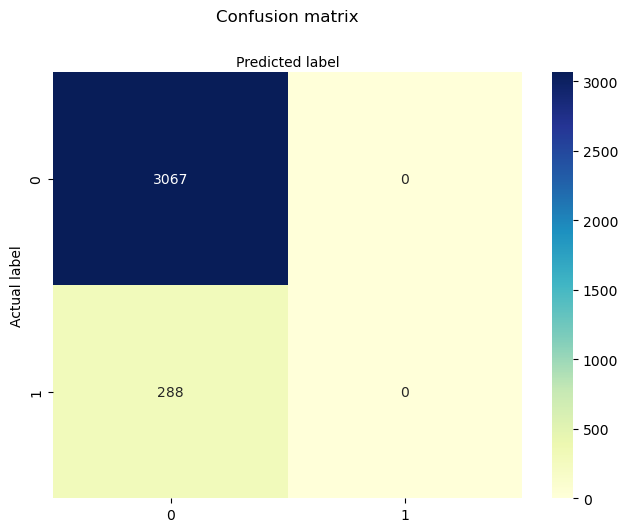

In [53]:
# Heatmap to show confision matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Evaluation Metrics

In [54]:
# Report with classification metrics
target_names = ['No casulties', 'Casulties']
report = classification_report(y_testb, y_pred, target_names = target_names, output_dict=True)
df_result = pd.DataFrame(report).transpose()

c:\Users\magdz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\magdz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\magdz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
df_result

,precision,recall,f1-score,support
No casulties,0.914158,1.000000,0.955154,3067.000000
Casulties,0.000000,0.000000,0.000000,288.000000
accuracy,0.914158,0.914158,0.914158,0.914158
macro avg,0.457079,0.500000,0.477577,3355.000000
weighted avg,0.835685,0.914158,0.873162,3355.000000


#### ROC Curve

In [56]:
def roc_curve(test, prob) :
    fpr, tpr, _ = metrics.roc_curve(test,  prob)
    auc = metrics.roc_auc_score(test, prob)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

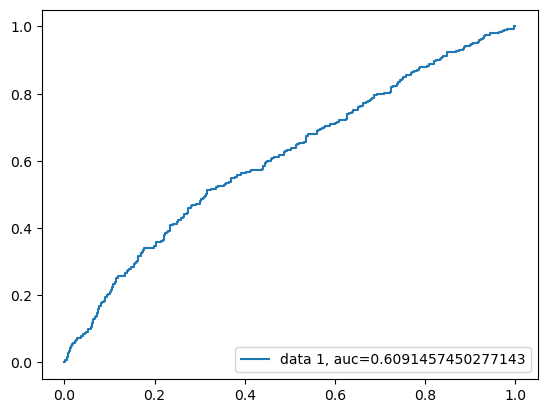

In [57]:
# Receiver Operating Characteristic on chart
y_pred_proba = log_reg.predict_proba(X_testb)[::,1]
roc_curve(y_testb, y_pred_proba)

### Pre Processing


In [58]:
# Copy of the last dataset
dfp = df_mode.copy()

In [59]:
dfp.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Ignition_Source,Incident_Station_Area,Incident_Ward,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,Property_Use_Cat,Response_Time,DAY(Fire_Under_Control_Time),DAY(Last_TFS_Unit_Clear_Time),DAY(TFS_Alarm_Time),DAY(TFS_Arrival_Time),MONTH(Fire_Under_Control_Time),MONTH(Last_TFS_Unit_Clear_Time),MONTH(TFS_Alarm_Time),MONTH(TFS_Arrival_Time),WEEKDAY(Fire_Under_Control_Time),WEEKDAY(Last_TFS_Unit_Clear_Time),WEEKDAY(TFS_Alarm_Time),WEEKDAY(TFS_Arrival_Time),YEAR(Fire_Under_Control_Time),YEAR(Last_TFS_Unit_Clear_Time),YEAR(TFS_Alarm_Time),YEAR(TFS_Arrival_Time)
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7706,31,0,0,12,9,3,3,2,10,133,12.0,22,2,1,34,6,3,2,0,7.666667,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
7690,11,0,0,0,1,0,1,0,69,121,16.0,10,3,17,125,4,1,1,0,7.366667,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
2912,18,0,0,0,0,3,3,1,73,441,2.0,14,2,20,63,4,3,7,1,6.250000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
7716,15,0,0,0,0,4,2,3,12,442,11.0,14,2,2,149,6,4,2,1,5.150000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
2913,11,0,0,2,10,3,3,2,75,244,40.0,49,2,20,34,4,0,3,0,6.250000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011


In [60]:
dfp.describe()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Ignition_Source,Incident_Station_Area,Incident_Ward,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,Property_Use_Cat,Response_Time,DAY(Fire_Under_Control_Time),DAY(Last_TFS_Unit_Clear_Time),DAY(TFS_Alarm_Time),DAY(TFS_Arrival_Time),MONTH(Fire_Under_Control_Time),MONTH(Last_TFS_Unit_Clear_Time),MONTH(TFS_Alarm_Time),MONTH(TFS_Arrival_Time),WEEKDAY(Fire_Under_Control_Time),WEEKDAY(Last_TFS_Unit_Clear_Time),WEEKDAY(TFS_Alarm_Time),WEEKDAY(TFS_Arrival_Time),YEAR(Fire_Under_Control_Time),YEAR(Last_TFS_Unit_Clear_Time),YEAR(TFS_Alarm_Time),YEAR(TFS_Arrival_Time)
count,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000
mean,34.454521,0.084787,0.062338,17.055451,1.639925,3.273052,1.692246,0.841427,53.941597,288.427600,19.582685,29.327430,2.270817,11.064037,95.666846,4.597621,1.944907,2.492443,0.297737,5.000817,15.886683,15.889008,15.880959,15.878276,6.217959,6.213398,6.217691,6.217870,3.066005,3.059208,3.068867,3.070477,2014.751185,2014.751722,2014.751185,2014.751185
std,22.255735,0.278576,0.964001,118.159166,2.878461,1.891875,1.073507,1.072583,24.080762,107.452027,11.762782,15.978273,0.726693,6.924097,55.561304,1.534012,1.404824,1.507661,0.457284,3.093917,8.736909,8.737400,8.737416,8.737635,3.422040,3.421505,3.422071,3.422164,1.993758,1.993657,1.994155,1.994278,2.469850,2.469868,2.469850,2.469850
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,2011.000000,2011.000000,2011.000000
25%,11.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,44.000000,221.000000,10.000000,14.000000,2.000000,5.000000,34.000000,4.000000,1.000000,1.000000,0.000000,4.066667,8.000000,8.000000,8.000000,8.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2013.000000,2013.000000,2013.000000,2013.000000
50%,31.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,0.000000,65.000000,314.000000,19.000000,31.000000,2.000000,10.000000,125.000000,4.000000,2.000000,2.000000,0.000000,4.850000,16.000000,16.000000,16.000000,16.000000,6.000000,6.000000,6.000000,6.000000,3.000000,3.000000,3.000000,3.000000,2015.000000,2015.000000,2015.000000,2015.000000
75%,57.000000,0.000000,0.000000,1.000000,1.000000,5.000000,3.000000,2.000000,75.000000,411.000000,28.000000,45.000000,3.000000,19.000000,125.000000,5.000000,3.000000,3.000000,1.000000,5.766667,23.000000,23.000000,23.000000,23.000000,9.000000,9.000000,9.000000,9.000000,5.000000,5.000000,5.000000,5.000000,2017.000000,2017.000000,2017.000000,2017.000000
max,72.000000,1.000000,86.000000,999.000000,11.000000,6.000000,3.000000,3.000000,81.000000,445.000000,44.000000,53.000000,4.000000,23.000000,216.000000,10.000000,5.000000,7.000000,1.000000,297.850000,31.000000,31.000000,31.000000,31.000000,12.000000,12.000000,12.000000,12.000000,6.000000,6.000000,6.000000,6.000000,2019.000000,2019.000000,2019.000000,2019.000000


#### Outliners Check

In [61]:
# List of lower outliners with treshold and number of values
mf.lower_treshholders(dfp)

Column: Method_Of_Fire_Control
Lower treshold 0.5
Ilosc wartosci ponizej dolnego outlinera: 253

Column: Smoke_Alarm_at_Fire_Origin_Alarm_Failure
Lower treshold 2.5
Ilosc wartosci ponizej dolnego outlinera: 321

Column: Response_Time
Lower treshold 1.5166666666666662
Ilosc wartosci ponizej dolnego outlinera: 32



In [62]:
# List of upper outliners with treshold and number of values
mf.upper_treshholders(dfp)

Column: Civilian_Casualties
Upper treshold 0.0
Ilosc wartosci powyzej górnego outlinera: 948

Column: Count_of_Persons_Rescued
Upper treshold 0.0
Ilosc wartosci powyzej górnego outlinera: 327

Column: Estimated_Number_Of_Persons_Displaced
Upper treshold 2.5
Ilosc wartosci powyzej górnego outlinera: 2079

Column: Extent_Of_Fire
Upper treshold 2.5
Ilosc wartosci powyzej górnego outlinera: 1660

Column: Smoke_Alarm_at_Fire_Origin_Alarm_Failure
Upper treshold 6.5
Ilosc wartosci powyzej górnego outlinera: 1709

Column: Status_of_Fire_On_Arrival
Upper treshold 6.0
Ilosc wartosci powyzej górnego outlinera: 173

Column: Response_Time
Upper treshold 8.316666666666666
Ilosc wartosci powyzej górnego outlinera: 178



In [63]:
dfp.dtypes

Area_of_Origin                                int32
Civilian_Casualties                           int64
Count_of_Persons_Rescued                      int64
Estimated_Number_Of_Persons_Displaced         int64
Extent_Of_Fire                                int32
Fire_Alarm_System_Impact_on_Evacuation        int32
Fire_Alarm_System_Operation                   int32
Fire_Alarm_System_Presence                    int32
Ignition_Source                               int32
Incident_Station_Area                         int64
Incident_Ward                               float64
Material_First_Ignited                        int32
Method_Of_Fire_Control                        int32
Possible_Cause                                int32
Property_Use                                  int32
Smoke_Alarm_at_Fire_Origin_Alarm_Failure      int32
Smoke_Alarm_at_Fire_Origin_Alarm_Type         int32
Status_of_Fire_On_Arrival                     int32
Property_Use_Cat                              int32
Response_Tim

In [64]:
# Change outliners to boarder value

lower_col = ['Method_Of_Fire_Control', 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure', 'Response_Time']
upper_col = ['Estimated_Number_Of_Persons_Displaced', 'Extent_Of_Fire', 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure', 'Status_of_Fire_On_Arrival', 'Response_Time']


In [65]:
# Lower tresh
for col in lower_col :
    dfp[col] = np.where(dfp[col] < mf.lower_tresh(dfp[col]), mf.lower_tresh(dfp[col]), dfp[col])

In [66]:
# Upper Tresh
for col in upper_col :
    dfp[col] = np.where(dfp[col] > mf.upper_tresh(dfp[col]), mf.upper_tresh(dfp[col]), dfp[col])

In [67]:
# List of lower outliners with treshold and number of values
mf.lower_treshholders(dfp)

In [68]:
# List of upper outliners with treshold and number of values
mf.upper_treshholders(dfp)

Column: Civilian_Casualties
Upper treshold 0.0
Ilosc wartosci powyzej górnego outlinera: 948

Column: Count_of_Persons_Rescued
Upper treshold 0.0
Ilosc wartosci powyzej górnego outlinera: 327



In [69]:
dfp.sample(5)

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Ignition_Source,Incident_Station_Area,Incident_Ward,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,Property_Use_Cat,Response_Time,DAY(Fire_Under_Control_Time),DAY(Last_TFS_Unit_Clear_Time),DAY(TFS_Alarm_Time),DAY(TFS_Arrival_Time),MONTH(Fire_Under_Control_Time),MONTH(Last_TFS_Unit_Clear_Time),MONTH(TFS_Alarm_Time),MONTH(TFS_Arrival_Time),WEEKDAY(Fire_Under_Control_Time),WEEKDAY(Last_TFS_Unit_Clear_Time),WEEKDAY(TFS_Alarm_Time),WEEKDAY(TFS_Arrival_Time),YEAR(Fire_Under_Control_Time),YEAR(Last_TFS_Unit_Clear_Time),YEAR(TFS_Alarm_Time),YEAR(TFS_Arrival_Time)
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6898,11,0,0,0.0,0.0,0,1,0,57,226,32.0,10,3.0,17,125,4.0,2,1.0,0,4.133333,16,16,16,16,12,12,12,12,1,1,1,1,2014,2014,2014,2014
2415,11,1,0,0.0,2.5,3,3,1,69,142,8.0,10,3.0,17,4,4.0,4,1.0,0,5.316667,11,11,11,11,11,11,11,11,4,4,4,4,2016,2016,2016,2016
1142,52,0,0,0.0,0.0,0,1,0,75,232,21.0,40,3.0,1,107,4.0,3,2.0,1,4.916667,2,2,2,2,6,6,6,6,6,6,6,6,2019,2019,2019,2019
5492,12,0,0,0.0,0.0,3,3,2,23,224,31.0,7,3.0,2,38,4.0,0,3.0,1,3.033333,18,18,18,18,7,7,7,7,4,4,4,4,2014,2014,2014,2014
4904,11,0,0,2.5,1.0,0,3,2,12,426,18.0,31,2.0,2,37,4.0,0,5.0,1,4.733333,8,8,8,8,4,4,4,4,5,5,5,5,2017,2017,2017,2017


In [70]:
dfp.describe()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Ignition_Source,Incident_Station_Area,Incident_Ward,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,Property_Use_Cat,Response_Time,DAY(Fire_Under_Control_Time),DAY(Last_TFS_Unit_Clear_Time),DAY(TFS_Alarm_Time),DAY(TFS_Arrival_Time),MONTH(Fire_Under_Control_Time),MONTH(Last_TFS_Unit_Clear_Time),MONTH(TFS_Alarm_Time),MONTH(TFS_Arrival_Time),WEEKDAY(Fire_Under_Control_Time),WEEKDAY(Last_TFS_Unit_Clear_Time),WEEKDAY(TFS_Alarm_Time),WEEKDAY(TFS_Arrival_Time),YEAR(Fire_Under_Control_Time),YEAR(Last_TFS_Unit_Clear_Time),YEAR(TFS_Alarm_Time),YEAR(TFS_Arrival_Time)
count,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000
mean,34.454521,0.084787,0.062338,0.640327,0.796172,3.273052,1.692246,0.841427,53.941597,288.427600,19.582685,29.327430,2.282130,11.064037,95.666846,4.486182,1.944907,2.476970,0.297737,4.954044,15.886683,15.889008,15.880959,15.878276,6.217959,6.213398,6.217691,6.217870,3.066005,3.059208,3.068867,3.070477,2014.751185,2014.751722,2014.751185,2014.751185
std,22.255735,0.278576,0.964001,1.023137,0.883129,1.891875,1.073507,1.072583,24.080762,107.452027,11.762782,15.978273,0.694424,6.924097,55.561304,1.036093,1.404824,1.465871,0.457284,1.286376,8.736909,8.737400,8.737416,8.737635,3.422040,3.421505,3.422071,3.422164,1.993758,1.993657,1.994155,1.994278,2.469850,2.469868,2.469850,2.469850
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,111.000000,1.000000,0.000000,0.500000,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000,1.516667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,2011.000000,2011.000000,2011.000000
25%,11.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,44.000000,221.000000,10.000000,14.000000,2.000000,5.000000,34.000000,4.000000,1.000000,1.000000,0.000000,4.066667,8.000000,8.000000,8.000000,8.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2013.000000,2013.000000,2013.000000,2013.000000
50%,31.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,0.000000,65.000000,314.000000,19.000000,31.000000,2.000000,10.000000,125.000000,4.000000,2.000000,2.000000,0.000000,4.850000,16.000000,16.000000,16.000000,16.000000,6.000000,6.000000,6.000000,6.000000,3.000000,3.000000,3.000000,3.000000,2015.000000,2015.000000,2015.000000,2015.000000
75%,57.000000,0.000000,0.000000,1.000000,1.000000,5.000000,3.000000,2.000000,75.000000,411.000000,28.000000,45.000000,3.000000,19.000000,125.000000,5.000000,3.000000,3.000000,1.000000,5.766667,23.000000,23.000000,23.000000,23.000000,9.000000,9.000000,9.000000,9.000000,5.000000,5.000000,5.000000,5.000000,2017.000000,2017.000000,2017.000000,2017.000000
max,72.000000,1.000000,86.000000,2.500000,2.500000,6.000000,3.000000,3.000000,81.000000,445.000000,44.000000,53.000000,4.000000,23.000000,216.000000,6.500000,5.000000,6.000000,1.000000,8.316667,31.000000,31.000000,31.000000,31.000000,12.000000,12.000000,12.000000,12.000000,6.000000,6.000000,6.000000,6.000000,2019.000000,2019.000000,2019.000000,2019.000000


#### Data Split

In [71]:
# Split Data for X and y
X = dfp.drop(columns= 'Civilian_Casualties')
y = dfp['Civilian_Casualties'].values.ravel()

In [72]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [73]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8944, 35) (8944,)
(2237, 35) (2237,)


#### Model Preperations

In [74]:
dfp['Civilian_Casualties'].value_counts()

Civilian_Casualties
0    10233
1      948
Name: count, dtype: int64

##### Class Imbalance

In [75]:
# Synthetic oversampling of training data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train, y_train)


In [76]:
# Synthetic oversampling of training data using ADASYN on SMOTE samples
adasyn = ADASYN(sampling_strategy='minority', random_state= 42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_resampled_smote, y_train_resampled_smote)

In [77]:
print(X_train_resampled.shape, y_train_resampled.shape)
print(X_test.shape, y_test.shape)

(16390, 35) (16390,)
(2237, 35) (2237,)


##### Pipeline Inits

In [78]:
# MinMax normalizacion scaler
scaler = MinMaxScaler()

In [79]:
# Dimensionality reduction using PCA
pca = PCA(n_components=0.95)

In [80]:
#RFECV init with model and CV steps
feature_selector  = RFECV(estimator=RandomForestClassifier(random_state=42), cv=5, step = 1)

### Models

#### Logistic Regression

In [81]:
# Model Init
logistic_regression = LogisticRegression()


In [82]:
df_ft...

SyntaxError: invalid syntax (1709698444.py, line 1)

In [83]:
def objective(trial):
    # Params for model
    params = {
        'C': trial.suggest_float('C', 0.0001, 10),
        'max_iter': trial.suggest_int('max_iter', 1, 10000),
        'solver' : trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag']),
        'penalty' : 'l2'
    }
    
    model = LogisticRegression(**params)
    

    # cross validation
    cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    score = cv_scores.mean()
    return score

In [84]:
study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=10, n_jobs=-1, timeout=300)

[I 2024-06-07 23:01:10,989] A new study created in memory with name: no-name-104fd9ee-e87f-48e3-8598-736a34ac5936
c:\Users\magdz\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\magdz\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:43: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
[I 2024-06-07 23:01:19,329] Trial 1 finished with value: 0.7466748017083588 and parameters: {'C': 4.772351199230231, 'max_iter': 7795, 'solver': 'liblinear'}. Best is trial 1 with value: 0.7466748017083588.
[I 2024-06-07 23:01:19,694] Trial 8 finished with value: 0.7467358145210493 and parameters: {'C': 1.21803824263887, 'max_iter': 7232, 'solver': 'liblinear'}. Best is trial 8 with value: 0.7467358145210493.
[I 2024-06-07 23:01:19,723] Trial 2 finished with value: 0.7466748017083586 and parameters: {'C': 9.

In [85]:
# Wyświetlenie najlepszych wyników
print('Najlepsze wyniki:', study.best_params)

Najlepsze wyniki: {'C': 4.820960062608684, 'max_iter': 6592, 'solver': 'liblinear'}


In [86]:
best_log_params = study.best_params
best_log_model = LogisticRegression(**best_log_params)


In [87]:
best_log_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', pca),
    ('adasyn', ADASYN(sampling_strategy='minority')),
    ('feature_selection', RFECV(estimator=best_log_model, step=1, cv=5, scoring='accuracy')),
    ('classifier', best_log_model)
])

In [88]:
best_log_pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scaler', MinMaxScaler()), ('pca', PCA(n_components=0.95)),
                ('adasyn', ADASYN(sampling_strategy='minority')),
                ('feature_selection',
                 RFECV(cv=5,
                       estimator=LogisticRegression(C=4.820960062608684,
                                                    max_iter=6592,
                                                    solver='liblinear'),
                       scoring='accuracy')),
                ('classifier',
                 LogisticRegression(C=4.820960062608684, max_iter=6592,
                                    solver='liblinear'))])

In [92]:
y_log_pred = best_log_pipeline.predict(X_test)

In [93]:
print("Classification Report:")
classification_decision = classification_report(y_test, y_log_pred, target_names = target_names, output_dict=True)
print(pd.DataFrame(classification_decision).transpose())

Classification Report:
              precision    recall  f1-score      support
No casulties   0.944104  0.679588  0.790300  2038.000000
Casulties      0.151948  0.587940  0.241486   199.000000
accuracy       0.671435  0.671435  0.671435     0.671435
macro avg      0.548026  0.633764  0.515893  2237.000000
weighted avg   0.873635  0.671435  0.741478  2237.000000


In [94]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_log_pred))

Confusion Matrix:
[[1385  653]
 [  82  117]]


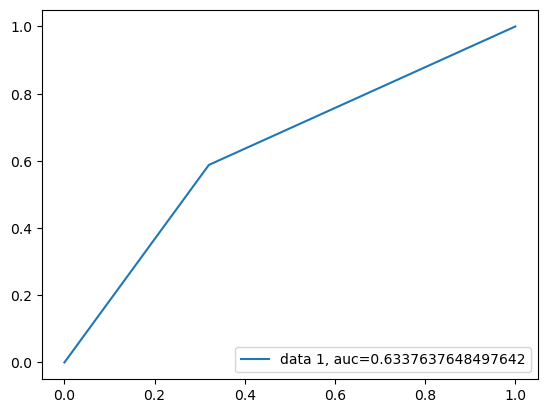

In [95]:
roc_curve(y_test, y_log_pred)

#### Decision Tree

In [96]:
dec_tree_model = DecisionTreeClassifier()

In [97]:
def obj_dec_tree(trials) :
    param = {
        'criterion' : trials.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
        'splitter': trials.suggest_categorical('splitter', ['best', 'random']),
        'max_depth' : trials.suggest_int('max_depth', 2, 50),
        'min_samples_split' : trials.suggest_float('min_samples_split', 0.0, 1.0),
        'ccp_alpha' : trials.suggest_float('ccp_alpha', 0.0, 0.2),
        'class_weight': 'balanced'
    }

    model = DecisionTreeClassifier(**param)

    cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv = 5, scoring= 'f1')
    score = cv_scores.mean()
    return score

In [99]:
study_tree = optuna.create_study(direction= 'maximize', pruner= optuna.pruners.MedianPruner())
study_tree.optimize(obj_dec_tree, n_trials=1000, n_jobs= -1, timeout= 300)

[I 2024-06-07 23:10:00,020] A new study created in memory with name: no-name-47ce203f-2e37-4ddd-82f1-2440c80f9a7c
[I 2024-06-07 23:10:00,738] Trial 7 finished with value: 0.7259280795827591 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 27, 'min_samples_split': 0.8253973217147925, 'ccp_alpha': 0.07098634203903265}. Best is trial 7 with value: 0.7259280795827591.
[I 2024-06-07 23:10:00,754] Trial 4 finished with value: 0.0 and parameters: {'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 0.6364043504175783, 'ccp_alpha': 0.155271540596306}. Best is trial 7 with value: 0.7259280795827591.
[I 2024-06-07 23:10:00,759] Trial 6 finished with value: 0.7150837302517731 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 36, 'min_samples_split': 0.9453262218341216, 'ccp_alpha': 0.05810743168600079}. Best is trial 7 with value: 0.7259280795827591.
[I 2024-06-07 23:10:00,769] Trial 10 finished with value: 0.719

In [100]:
# Best Params
print('Best Params', study_tree.best_params)

Best Params {'criterion': 'gini', 'splitter': 'best', 'max_depth': 17, 'min_samples_split': 0.00010722774846707922, 'ccp_alpha': 0.00018362420772474964}


In [101]:
best_tree_params = study_tree.best_params
best_tree_model = DecisionTreeClassifier(**best_tree_params)

In [102]:
best_tree_pipeline = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('adasyn', adasyn),
    ('feature_selection', RFECV(estimator=best_tree_model, step=1, cv=5, scoring='f1')),
    ('classifier', best_tree_model)
])

In [103]:
best_tree_pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scaler', MinMaxScaler()), ('pca', PCA(n_components=0.95)),
                ('adasyn',
                 ADASYN(random_state=42, sampling_strategy='minority')),
                ('feature_selection',
                 RFECV(cv=5,
                       estimator=DecisionTreeClassifier(ccp_alpha=0.00018362420772474964,
                                                        max_depth=17,
                                                        min_samples_split=0.00010722774846707922),
                       scoring='f1')),
                ('classifier',
                 DecisionTreeClassifier(ccp_alpha=0.00018362420772474964,
                                        max_depth=17,
                                        min_samples_split=0.00010722774846707922))])

In [104]:
y_pred_tree = best_tree_pipeline.predict(X_test)

In [105]:
print('Classification Report:')
classification_decision_tree = classification_report(y_test, y_pred_tree, target_names= target_names, output_dict= True, zero_division=1)
print(pd.DataFrame(classification_decision_tree).transpose())

Classification Report:
              precision    recall  f1-score      support
No casulties   0.926671  0.768891  0.840440  2038.000000
Casulties      0.137363  0.376884  0.201342   199.000000
accuracy       0.734019  0.734019  0.734019     0.734019
macro avg      0.532017  0.572888  0.520891  2237.000000
weighted avg   0.856455  0.734019  0.783587  2237.000000


In [ ]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_tree))

Confusion Matrix:
[[2038    0]
 [ 199    0]]


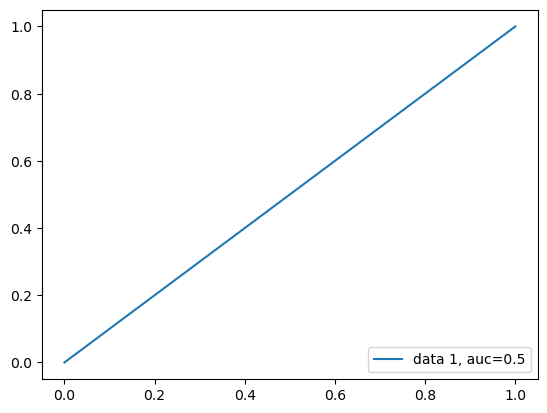

In [ ]:
roc_curve(y_test, y_pred_tree)

#### Random Forest

In [106]:
rf = RandomForestClassifier()

In [108]:
def obj_dec_rf(trial) :
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 5, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'class_weight': 'balanced'
}
    model = RandomForestClassifier(**param)

    pipeline = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('feature_selector', feature_selector),
    ('classifier', model)
    ])

    cv_score = cross_val_score(model, X_train_resampled, y_train_resampled, cv = 5, scoring= 'accuracy')
    return cv_score.mean()

In [109]:
study_rf = optuna.create_study(direction='maximize', pruner= optuna.pruners.MedianPruner())
study_rf.optimize(obj_dec_rf, n_trials= 100, n_jobs= -1, timeout= 300)

[I 2024-06-07 23:13:56,405] A new study created in memory with name: no-name-872e3a6e-2bc2-4fb5-a6f0-a8d07e0734c9
[I 2024-06-07 23:14:10,217] Trial 2 finished with value: 0.8833435021354484 and parameters: {'n_estimators': 89, 'max_depth': 8, 'min_samples_split': 14, 'min_samples_leaf': 17, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 2 with value: 0.8833435021354484.
[I 2024-06-07 23:14:15,378] Trial 5 finished with value: 0.9189139719341062 and parameters: {'n_estimators': 114, 'max_depth': 24, 'min_samples_split': 18, 'min_samples_leaf': 16, 'max_features': 'log2', 'bootstrap': True}. Best is trial 5 with value: 0.9189139719341062.
[I 2024-06-07 23:14:16,577] Trial 10 finished with value: 0.9317876754118364 and parameters: {'n_estimators': 110, 'max_depth': 16, 'min_samples_split': 17, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True}. Best is trial 10 with value: 0.9317876754118364.
[I 2024-06-07 23:14:16,984] Trial 4 finished with value: 0.93770591824

In [ ]:
# Best Params
print('Best Params: ', study_rf.best_params)

Best Params:  {'n_estimators': 76, 'max_depth': 38, 'min_samples_split': 14, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True}


In [ ]:
best_rf_params = study_rf.best_params
best_rf_model = RandomForestClassifier(**best_rf_params)


In [ ]:
best_rd_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', pca),
    ('adasyn', ADASYN(sampling_strategy='minority')),
    ('feature_selection', RFECV(estimator=best_rf_model, step=1, cv=5, scoring='accuracy')),
    ('classifier', best_rf_model)
])

In [ ]:
best_rd_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('pca', PCA(n_components=0.95)),
                ('adasyn', ADASYN(sampling_strategy='minority')),
                ('feature_selection',
                 RFECV(cv=5,
                       estimator=RandomForestClassifier(max_depth=38,
                                                        max_features='log2',
                                                        min_samples_leaf=3,
                                                        min_samples_split=14,
                                                        n_estimators=76),
                       scoring='accuracy')),
                ('classifier',
                 RandomForestClassifier(max_depth=38, max_features='log2',
                                        min_samples_leaf=3,
                                        min_samples_split=14,
                                        n_estimators=76))])

In [ ]:
y_pred_rf = best_rd_pipeline.predict(X_test)

In [ ]:
print('Classification Report: ')
classification_svc = classification_report(y_test, y_pred_rf, target_names= target_names, output_dict= True)
print(pd.DataFrame(classification_svc).transpose())

Classification Report: 
              precision    recall  f1-score      support
No casulties   0.921757  0.895976  0.908684  2038.000000
Casulties      0.171875  0.221106  0.193407   199.000000
accuracy       0.835941  0.835941  0.835941     0.835941
macro avg      0.546816  0.558541  0.551045  2237.000000
weighted avg   0.855048  0.835941  0.845054  2237.000000


In [ ]:
print('Confusion Matrix:')
confusion_matrix(y_test, y_pred_rf)

Confusion Matrix:


array([[1826,  212],
       [ 155,   44]], dtype=int64)

#### SVC

In [ ]:
# Model Init
svc = LinearSVC()

In [ ]:
def obj_dec_svc(trials) :
    param = {
        'max_iter': 1000,
        'C': trials.suggest_float('C', 0.1, 1000),
        'penalty': trials.suggest_categorical('penalty', ['l1', 'l2']),
        'loss': 'hinge',
        'multi_class': trials.suggest_categorical('multi_class', ['ovr', 'crammer_singer'])
}
    model = LinearSVC(**param)

    pipeline = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('feature_selector', feature_selector),
    ('classifier', model)
    ])

    cv_score = cross_val_score(pipeline, X_1per, y_1per, cv = 5, scoring= 'accuracy')
    return cv_score.mean()

In [ ]:
study_svc = optuna.create_study(direction='maximize', pruner= optuna.pruners.MedianPruner())
#study_svc.optimize(obj_dec_svc, n_trials= 10, n_jobs= -1, timeout= 300)

[I 2024-06-07 20:22:18,393] A new study created in memory with name: no-name-8024d0f2-e98a-4faf-b245-172ef82638fe


In [ ]:
# Best Params
print('Best Params: ', study_svc.best_params)

ValueError: No trials are completed yet.

In [ ]:
#best_svc_params = study_svc.best_params
best_svc_model = LinearSVC(C = 106.65157800496455, penalty = 'l2', multi_class= 'ovr')

In [ ]:
best_svc_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', pca),
    ('adasyn', ADASYN(sampling_strategy='minority')),
    ('feature_selection', RFECV(estimator=best_svc_model, step=1, cv=5, scoring='accuracy')),
    ('classifier', best_svc_model)
])

In [ ]:
best_svc_pipeline.fit(X_train, y_train)

c:\Users\magdz\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\magdz\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\magdz\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\magdz\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\magdz\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\magdz\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

Pipeline(steps=[('scaler', MinMaxScaler()), ('pca', PCA(n_components=0.95)),
                ('adasyn', ADASYN(sampling_strategy='minority')),
                ('feature_selection',
                 RFECV(cv=5, estimator=LinearSVC(C=106.65157800496455),
                       scoring='accuracy')),
                ('classifier', LinearSVC(C=106.65157800496455))])

In [ ]:
y_pred_svc = best_svc_pipeline.predict(X_test)

In [ ]:
print('Classification Report: ')
classification_svc = classification_report(y_test, y_pred_svc, target_names= target_names, output_dict= True)
print(pd.DataFrame(classification_svc).transpose())

Classification Report: 
              precision    recall  f1-score      support
No casulties   0.943396  0.686948  0.795003  2038.000000
Casulties      0.152722  0.577889  0.241597   199.000000
accuracy       0.677246  0.677246  0.677246     0.677246
macro avg      0.548059  0.632419  0.518300  2237.000000
weighted avg   0.873059  0.677246  0.745773  2237.000000


In [ ]:
print('Confusion Matrix:')
confusion_matrix(y_test, y_pred_svc)

Confusion Matrix:


array([[1400,  638],
       [  84,  115]], dtype=int64)

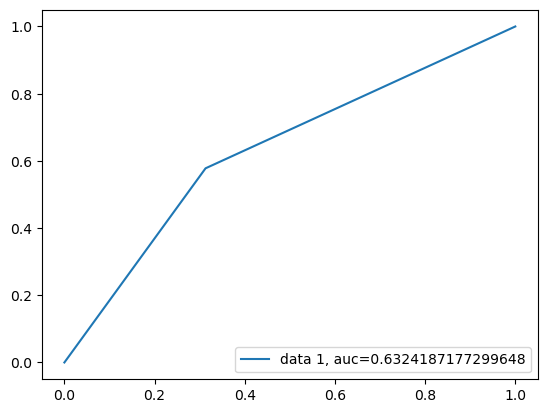

In [ ]:
roc_curve(y_test, y_pred_svc)

#### Naive Bayes

In [ ]:
# Model
nb = MultinomialNB()

In [ ]:
def obj_nb(trials) :
    param = {
    'alpha' : trials.suggest_float('alpha', 0.1, 10.0),
    'fit_prior' : trials.suggest_categorical('fit_prior', [True, False])
    }
    
    model = MultinomialNB(**param)

    pipeline = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('feature_selector', feature_selector),
    ('classifier', model)
    ])

    cros_score = cross_val_score(model, X_1per, y_1per, cv= 5, scoring= 'accuracy')
    return cros_score.mean()

In [ ]:
pd.DataFrame(X_train_resampled).describe()

,Area_of_Origin,Count_of_Persons_Rescued,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Ignition_Source,Incident_Station_Area,Incident_Ward,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,Property_Use_Cat,Response_Time,DAY(Fire_Under_Control_Time),DAY(Last_TFS_Unit_Clear_Time),DAY(TFS_Alarm_Time),DAY(TFS_Arrival_Time),MONTH(Fire_Under_Control_Time),MONTH(Last_TFS_Unit_Clear_Time),MONTH(TFS_Alarm_Time),MONTH(TFS_Arrival_Time),WEEKDAY(Fire_Under_Control_Time),WEEKDAY(Last_TFS_Unit_Clear_Time),WEEKDAY(TFS_Alarm_Time),WEEKDAY(TFS_Arrival_Time),YEAR(Fire_Under_Control_Time),YEAR(Last_TFS_Unit_Clear_Time),YEAR(TFS_Alarm_Time),YEAR(TFS_Arrival_Time)
count,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000,16390.000000
mean,32.361013,0.120012,0.888994,0.976588,3.101403,1.579317,0.674436,55.416290,291.760586,19.078220,27.509457,2.323255,11.788041,95.373703,4.409613,1.649359,2.416859,0.179683,4.928993,15.466748,15.484137,15.471873,15.454118,6.054728,6.047102,6.053935,6.054667,2.876449,2.849481,2.886516,2.888347,2014.719341,2014.720134,2014.719341,2014.719341
std,22.151670,0.950573,1.007355,0.855031,1.779221,1.044626,0.945549,23.333703,109.867468,11.617898,16.085011,0.639325,6.525251,53.660302,0.929469,1.346173,1.341339,0.383935,1.170214,8.478870,8.471130,8.483529,8.481466,3.271529,3.271154,3.271440,3.271614,1.849826,1.851390,1.850718,1.850302,2.259764,2.260119,2.259764,2.259764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,111.000000,1.000000,0.000000,0.500000,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000,1.516667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,2011.000000,2011.000000,2011.000000
25%,11.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,47.000000,222.000000,9.000000,10.000000,2.000000,6.000000,34.000000,4.000000,0.000000,1.067429,0.000000,4.144236,8.000000,8.000000,8.000000,8.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2013.000000,2013.000000,2013.000000,2013.000000
50%,27.000000,0.000000,0.335280,1.000000,3.000000,1.000000,0.000000,67.000000,317.000000,17.773303,25.000000,2.000000,13.000000,125.000000,4.000000,2.000000,2.000000,0.000000,4.850000,15.000000,15.000000,15.000000,15.000000,6.000000,6.000000,6.000000,6.000000,3.000000,3.000000,3.000000,3.000000,2015.000000,2015.000000,2015.000000,2015.000000
75%,55.000000,0.000000,2.000000,1.436966,4.000000,3.000000,1.000000,69.000000,413.000000,28.000000,45.000000,3.000000,17.000000,125.000000,4.705568,3.000000,3.000000,0.000000,5.679843,23.000000,23.000000,23.000000,23.000000,9.000000,9.000000,9.000000,9.000000,4.000000,4.000000,4.000000,4.000000,2016.000000,2016.000000,2016.000000,2016.000000
max,72.000000,86.000000,2.500000,2.500000,6.000000,3.000000,3.000000,81.000000,445.000000,44.000000,53.000000,4.000000,23.000000,216.000000,6.500000,5.000000,6.000000,1.000000,8.316667,31.000000,31.000000,31.000000,31.000000,12.000000,12.000000,12.000000,12.000000,6.000000,6.000000,6.000000,6.000000,2019.000000,2019.000000,2019.000000,2019.000000


In [ ]:
study_nb = optuna.create_study(direction='maximize', pruner= optuna.pruners.MedianPruner())
study_nb.optimize(obj_nb, n_trials=100, n_jobs= -1, timeout=300)

[I 2024-06-07 22:24:00,790] A new study created in memory with name: no-name-c15c0ce5-3f5a-47f7-b8df-2f7289941185
[I 2024-06-07 22:24:01,233] Trial 1 finished with value: 0.5695075757575758 and parameters: {'alpha': 8.990422293885791, 'fit_prior': True}. Best is trial 1 with value: 0.5695075757575758.
[I 2024-06-07 22:24:01,293] Trial 7 finished with value: 0.5757575757575758 and parameters: {'alpha': 5.291675929450854, 'fit_prior': True}. Best is trial 7 with value: 0.5757575757575758.
[I 2024-06-07 22:24:01,323] Trial 6 finished with value: 0.5820075757575758 and parameters: {'alpha': 2.9363686996549614, 'fit_prior': True}. Best is trial 6 with value: 0.5820075757575758.
[I 2024-06-07 22:24:01,358] Trial 4 finished with value: 0.5820075757575758 and parameters: {'alpha': 3.986035903716365, 'fit_prior': False}. Best is trial 6 with value: 0.5820075757575758.
[I 2024-06-07 22:24:01,399] Trial 5 finished with value: 0.5757575757575758 and parameters: {'alpha': 6.270394423205074, 'fit_pr

In [ ]:
# Best Params
print('Best Params: ', study_nb.best_params)

Best Params:  {'alpha': 0.15499886098049664, 'fit_prior': False}


In [ ]:
best_nb_params = study_nb.best_params
best_nb_model = MultinomialNB(**best_nb_params)

In [ ]:
best_nb_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', pca),
    ('adasyn', ADASYN(sampling_strategy='minority')),
    ('feature_selection', RFECV(estimator=best_nb_model, step=1, cv=5, scoring='accuracy')),
    ('classifier', best_nb_model)
])

In [ ]:
pd.DataFrame(X_train).describe()

,Area_of_Origin,Count_of_Persons_Rescued,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Ignition_Source,Incident_Station_Area,Incident_Ward,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,Property_Use_Cat,Response_Time,DAY(Fire_Under_Control_Time),DAY(Last_TFS_Unit_Clear_Time),DAY(TFS_Alarm_Time),DAY(TFS_Arrival_Time),MONTH(Fire_Under_Control_Time),MONTH(Last_TFS_Unit_Clear_Time),MONTH(TFS_Alarm_Time),MONTH(TFS_Arrival_Time),WEEKDAY(Fire_Under_Control_Time),WEEKDAY(Last_TFS_Unit_Clear_Time),WEEKDAY(TFS_Alarm_Time),WEEKDAY(TFS_Arrival_Time),YEAR(Fire_Under_Control_Time),YEAR(Last_TFS_Unit_Clear_Time),YEAR(TFS_Alarm_Time),YEAR(TFS_Arrival_Time)
count,8944.00000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000,8944.000000
mean,34.54025,0.065183,0.648647,0.797015,3.261963,1.695886,0.838551,53.966570,289.607223,19.629696,29.404182,2.284101,11.049754,95.365720,4.483900,1.936382,2.474955,0.296959,4.949689,15.843359,15.849173,15.840004,15.835868,6.237142,6.232223,6.236807,6.237030,3.080948,3.069767,3.082066,3.083296,2014.755255,2014.755814,2014.755255,2014.755255
std,22.23891,1.058133,1.027391,0.881921,1.897438,1.071565,1.071150,24.133604,107.035592,11.769676,15.966342,0.696198,6.930066,55.645524,1.035984,1.398582,1.461435,0.456944,1.281553,8.753304,8.752895,8.753741,8.754080,3.428606,3.428128,3.428646,3.428761,1.989444,1.988800,1.990747,1.990443,2.463856,2.464025,2.463856,2.463856
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,111.000000,1.000000,0.000000,0.500000,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000,1.516667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,2011.000000,2011.000000,2011.000000
25%,11.00000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,44.000000,221.000000,10.000000,14.000000,2.000000,5.000000,34.000000,4.000000,1.000000,1.000000,0.000000,4.083333,8.000000,8.000000,8.000000,8.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2013.000000,2013.000000,2013.000000,2013.000000
50%,31.00000,0.000000,0.000000,1.000000,3.000000,1.000000,0.000000,65.000000,314.000000,19.000000,31.000000,2.000000,10.000000,125.000000,4.000000,2.000000,2.000000,0.000000,4.850000,16.000000,16.000000,16.000000,16.000000,6.000000,6.000000,6.000000,6.000000,3.000000,3.000000,3.000000,3.000000,2015.000000,2015.000000,2015.000000,2015.000000
75%,57.00000,0.000000,1.000000,1.000000,5.000000,3.000000,2.000000,75.000000,411.000000,28.000000,45.000000,3.000000,19.000000,125.000000,5.000000,3.000000,3.000000,1.000000,5.750000,23.000000,23.000000,23.000000,23.000000,9.000000,9.000000,9.000000,9.000000,5.000000,5.000000,5.000000,5.000000,2017.000000,2017.000000,2017.000000,2017.000000
max,72.00000,86.000000,2.500000,2.500000,6.000000,3.000000,3.000000,81.000000,445.000000,44.000000,53.000000,4.000000,23.000000,216.000000,6.500000,5.000000,6.000000,1.000000,8.316667,31.000000,31.000000,31.000000,31.000000,12.000000,12.000000,12.000000,12.000000,6.000000,6.000000,6.000000,6.000000,2019.000000,2019.000000,2019.000000,2019.000000


In [ ]:
best_nb_pipeline.fit(X_train, y_train)

ValueError: Negative values in data passed to MultinomialNB (input X)

In [ ]:
y_pred_nb = best_nb_pipeline.predict(X_test)

In [ ]:
print('Classification Report: ')
classification_nb = classification_report(y_test, y_pred_nb, target_names= target_names, output_dict= True)
print(pd.DataFrame(classification_svc).transpose())

In [ ]:
print('Confusion Matrix:')
confusion_matrix(y_test, y_pred_nb)

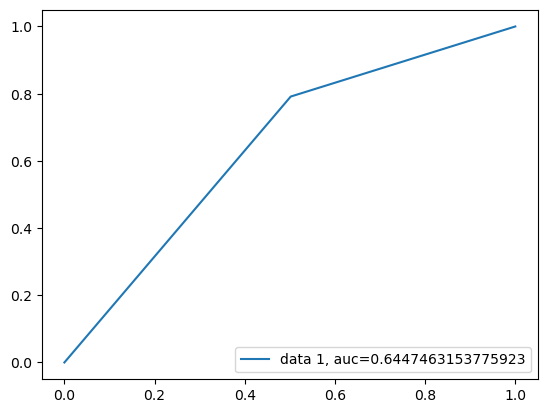

In [ ]:
roc_curve(y_test, y_pred_nb)

#### XGBoost


In [ ]:
# Model Init
xgb = XGBClassifier()

xgb_param_grid = {
    'n_estimators' : [1, 2, 3, 4, 5],
    'learning_rate' : [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth' : [2, 4, 6, 8],
    'gamma' : [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha' : [0, 0.001, 0.005, 0.01, 0.05],
    'reg_lambda' : [0, 0.001, 0.005, 0.01, 0.05]
}

In [ ]:
def obj_xb(trials) :
    param = {
    'n_estimators' : trials.suggest_int('n_estimators', 1, 5),
    'learning_rate' : trials.suggest_float('learning_rate', 0.01, 0.3),
    'max_depth' : trials.suggest_int('max_depth', 2, 8),
    'gamma' : trials.suggest_float('gamma', 0, 0.4),
    'reg_alpha' : trials.suggest_float('reg_alpha', 0,0.05),
    'reg_lambda' : trials.suggest_float('reg_lambda', 0, 0.05),
    'tree_method':'hist',
    'n_jobs' : -1
    }

    model = XGBClassifier(tree_method='hist', n_jobs = -1)

    pipeline = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('feature_selector', feature_selector),
    ('classifier', model)
    ])

    cros_score = cross_val_score(model, X_1per, y_1per, cv = 5, scoring = 'accuracy')
    return cros_score.mean()

In [ ]:
study_xb = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner())
study_xb.optimize(obj_xb, n_trials=100, n_jobs= -1, timeout=300)

[I 2024-06-07 22:27:32,762] A new study created in memory with name: no-name-430f607a-b874-4eb7-940d-2501e3a874a7
[I 2024-06-07 22:27:35,574] Trial 7 finished with value: 0.8289772727272726 and parameters: {'n_estimators': 4, 'learning_rate': 0.028468080778408608, 'max_depth': 3, 'gamma': 0.3976751567266383, 'reg_alpha': 0.010132207815569512, 'reg_lambda': 0.04258812759373504}. Best is trial 7 with value: 0.8289772727272726.
[I 2024-06-07 22:27:35,612] Trial 3 finished with value: 0.8289772727272726 and parameters: {'n_estimators': 1, 'learning_rate': 0.21844593985561298, 'max_depth': 2, 'gamma': 0.17032538973394018, 'reg_alpha': 0.015048224465427995, 'reg_lambda': 0.040549434395511945}. Best is trial 7 with value: 0.8289772727272726.
[I 2024-06-07 22:27:35,695] Trial 2 finished with value: 0.8289772727272726 and parameters: {'n_estimators': 4, 'learning_rate': 0.02316462316827001, 'max_depth': 6, 'gamma': 0.24082278624874143, 'reg_alpha': 0.028273656128103803, 'reg_lambda': 0.01015303

In [ ]:
# Best Params
print('Best Params: ', study_xb.best_params)

Best Params:  {'n_estimators': 4, 'learning_rate': 0.028468080778408608, 'max_depth': 3, 'gamma': 0.3976751567266383, 'reg_alpha': 0.010132207815569512, 'reg_lambda': 0.04258812759373504}


In [ ]:
best_xb_params = study_xb.best_params
best_xb_model = XGBClassifier(**best_xb_params)

In [ ]:
best_xb_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', pca),
    ('adasyn', ADASYN(sampling_strategy='minority')),
    ('feature_selection', RFECV(estimator=best_xb_model, step=1, cv=5, scoring='accuracy')),
    ('classifier', best_xb_model)
])

In [ ]:
best_xb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('pca', PCA(n_components=0.95)),
                ('adasyn', ADASYN(sampling_strategy='minority')),
                ('feature_selection',
                 RFECV(cv=5,
                       estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=Fals...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.028468080778408608, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=3,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=4, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
y_pred_xb = best_xb_pipeline.predict(X_test)

In [ ]:
print('Classification Report: ')
classification_xb = classification_report(y_test, y_pred_xb, target_names= target_names, output_dict= True)
print(pd.DataFrame(classification_svc).transpose())

Classification Report: 
              precision    recall  f1-score      support
No casulties   0.943396  0.686948  0.795003  2038.000000
Casulties      0.152722  0.577889  0.241597   199.000000
accuracy       0.677246  0.677246  0.677246     0.677246
macro avg      0.548059  0.632419  0.518300  2237.000000
weighted avg   0.873059  0.677246  0.745773  2237.000000


In [ ]:
print('Confusion Matrix:')
confusion_matrix(y_test, y_pred_xb)

Confusion Matrix:


array([[1031, 1007],
       [  49,  150]], dtype=int64)

In [ ]:
#RFECV init with model and CV steps
rfecv_xgb = RFECV(estimator= xgb, step= 1, cv = 5, scoring='accuracy')

In [ ]:
# Matching RFECV to training data
rfecv_xgb.fit(X_resample, y_resample)

RFECV(cv=5,
      estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=-1,
                              num_parallel_tree=None, random_state=None, ...),
      scoring='accuracy')

In [ ]:
# Selected Features
selected_features = rfecv_xgb.n_features_
print("Wybrane cechy:", selected_features)

Wybrane cechy: 23


In [ ]:
# Feature selection
X_train_selected = rfecv_xgb.transform(X_resample)
X_test_selected = rfecv_xgb.transform(X_test)

In [ ]:
print(f"Rozmiar X_train_selected: {X_train_selected.shape}, Rozmiar y_train: {y_resample.shape}")
print(f"Rozmiar X_test_selected: {X_test_selected.shape}, Rozmiar y_test: {y_test.shape}")

Rozmiar X_train_selected: (16339, 23), Rozmiar y_train: (16339,)
Rozmiar X_test_selected: (2237, 23), Rozmiar y_test: (2237,)


In [ ]:
# Obliczenie liczby próbek dla 1% oryginalnego zestawu danych
n_samples_1percent = int(0.01 * len(X_train_selected))

In [ ]:
# Split data for 1000 samples
X_train_sample, y_train_sample = resample(X_train_selected, y_resample, n_samples= n_samples_1percent, random_state= 42)

In [ ]:
print(f"Rozmiar X_train_selected: {X_train_sample.shape}, Rozmiar y_train: {y_train_sample.shape}")


Rozmiar X_train_selected: (163, 23), Rozmiar y_train: (163,)


In [ ]:
# Create GridSearchCV object with model, hyperparameter space and RFECV
grid_search_xgb = GridSearchCV(estimator= xgb, param_grid= xgb_param_grid, cv= 5, scoring= 'accuracy')

In [ ]:
# Find Best Params on sample dataset
grid_search_xgb.fit(X_train_sample, y_train_sample)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'max_depth': [2, 4, 6, 8],
                         'n_estimators': [1, 2, 3, 4, 5],
                         'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05],
                         'reg_lambda': [0, 0.001, 0.005, 0.01, 0.05]},
             scoring='accuracy')

In [ ]:
# Inicjalizacja obiektu PCA
min_components = min(X_train_selected.shape[0], X_train_selected.shape[1])
pca = PCA(n_components=min_components)

In [ ]:
# Dopasowanie PCA do danych treningowych i transformacja danych
X_train_pca = pca.fit_transform(X_train_selected)

In [ ]:
print(f"Rozmiar X_train_selected: {X_train_pca.shape}")

: 

In [ ]:
# Create GridSearchCV object with model, hyperparameter space and RFECV
grid_search_xgb_pca = GridSearchCV(estimator= xgb, param_grid= xgb_param_grid, cv= 5, scoring= 'accuracy')

In [ ]:
# Find Best Params on sample dataset - PCA
grid_search_xgb_pca.fit(X_train_pca, y_resample)

Exception ignored on calling ctypes callback function: <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x000001EC9CB8A150>>
Traceback (most recent call last):
  File "c:\Users\magdz\anaconda3\Lib\site-packages\xgboost\core.py", line 641, in _next_wrapper
    return self._handle_exception(lambda: self.next(input_data), 0)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\magdz\anaconda3\Lib\site-packages\xgboost\core.py", line 557, in _handle_exception
    return fn()
           ^^^^
  File "c:\Users\magdz\anaconda3\Lib\site-packages\xgboost\core.py", line 641, in <lambda>
    return self._handle_exception(lambda: self.next(input_data), 0)
                                          ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\magdz\anaconda3\Lib\site-packages\xgboost\data.py", line 1280, in next
    input_data(**self.kwargs)
  File "c:\Users\magdz\anaconda3\Lib\site-packages\xgboost\core.py", line 730, in inner_f
    re

: 

: 

In [ ]:
# Best hyperparameters found - Sample
best_params = grid_search_xgb.best_params_
print("Najlepsze hiperparametry:", best_params)

Najlepsze hiperparametry: {'gamma': 0, 'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 5, 'reg_alpha': 0, 'reg_lambda': 0}


In [ ]:
# Best hyperparameters found - PCA
best_params = grid_search_xgb_pca.best_params_
print("Najlepsze hiperparametry:", best_params)

In [ ]:
# Użycie najlepszych parametrów do wytrenowania modelu na pełnym zbiorze danych
xgb_best = XGBClassifier(**best_params)
xgb_best.fit(X_train, y_train)

In [ ]:
# Model evaluation on test data
accuracy = xgb_best.best_estimator_.score(X_test_selected, y_test)
print("Dokładność modelu na danych testowych:", accuracy)

In [ ]:
y_pred_xgb = xgb_best.best_estimator_.predict(X_test_selected)

In [ ]:
print("Classification Report:")
classification_decision = classification_report(y_test, y_pred_xgb, target_names = target_names, output_dict=True)
print(pd.DataFrame(classification_decision).transpose())

In [ ]:
print("Classification Report:")
classification_decision = classification_report(y_test, y_pred_xgb, target_names = target_names, output_dict=True)
print(pd.DataFrame(classification_decision).transpose())

In [ ]:
roc_curve(y_test, y_pred_xgb)